
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from tree_code import find_best_split
sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

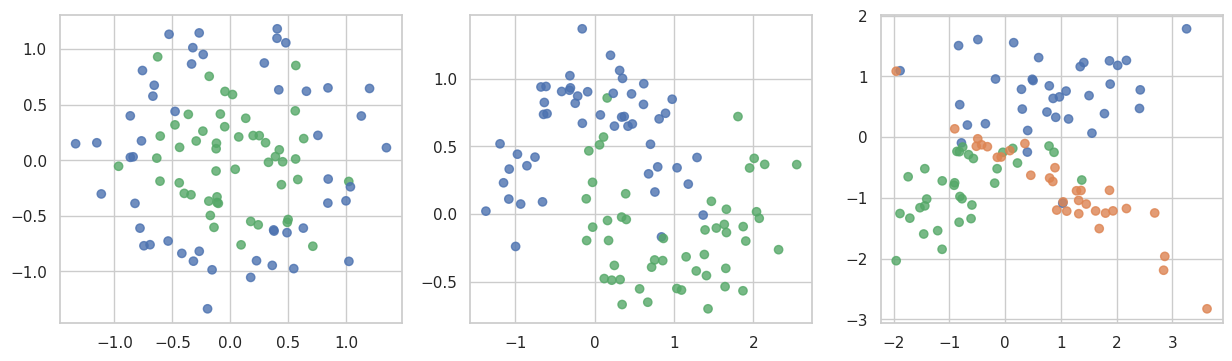

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

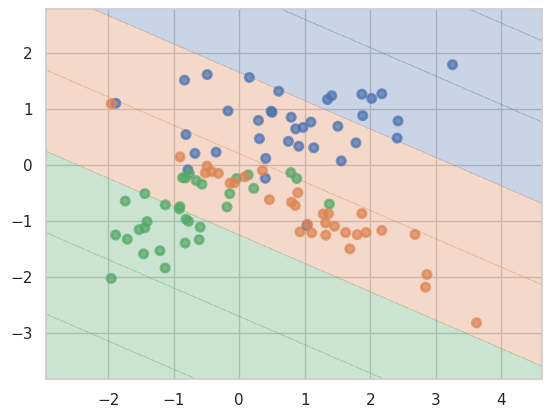

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [8]:
def loader(n):
    X, y = datasets[n-1] # загрузчик датасетов
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=987)
    return  X_train, X_test, y_train, y_test


1.0
0.7


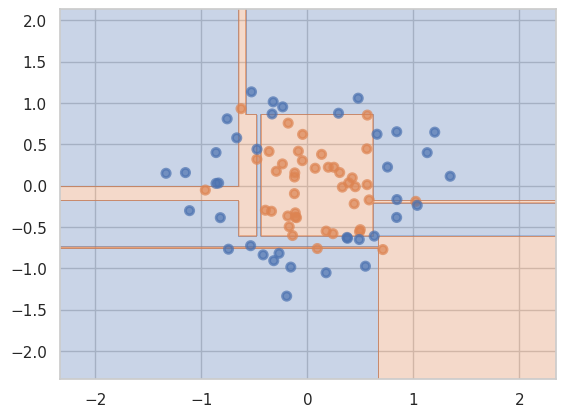

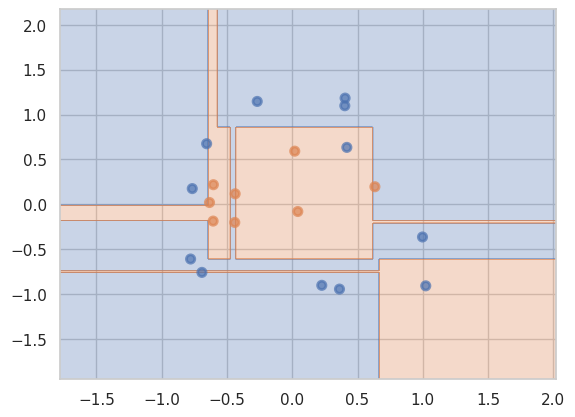

In [9]:
from sklearn.metrics import accuracy_score
x_train, x_valid, y_train, y_valid = loader(1) # обучаем первое дерево
model = DecisionTreeClassifier(random_state = 123)
model.fit(x_train,  y_train)
plot_surface(model, x_train, y_train)
plt.figure()
plot_surface(model, x_valid, y_valid)

print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_valid, model.predict(x_valid)))

1.0
0.95


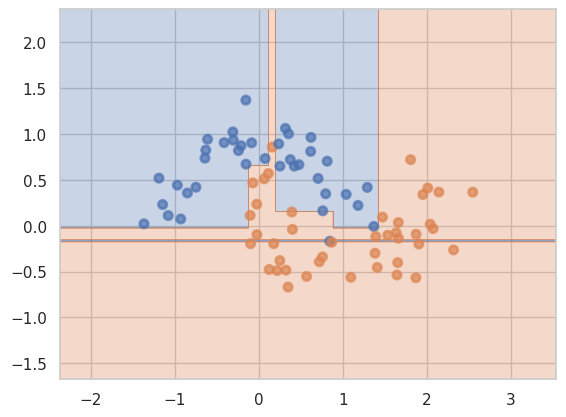

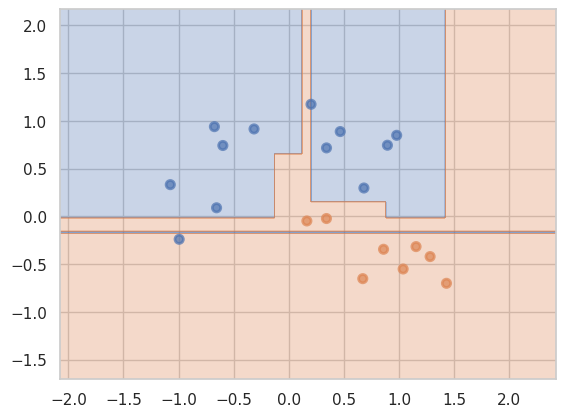

In [10]:
x_train, x_valid, y_train, y_valid = loader(2)# обучаем второе дерево
model = DecisionTreeClassifier(random_state = 123)
model.fit(x_train,  y_train)
plot_surface(model, x_train, y_train)
plt.figure()
plot_surface(model, x_valid, y_valid)

print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_valid, model.predict(x_valid)))


1.0
0.8


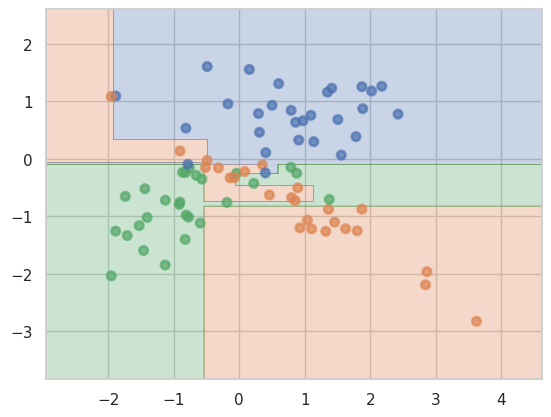

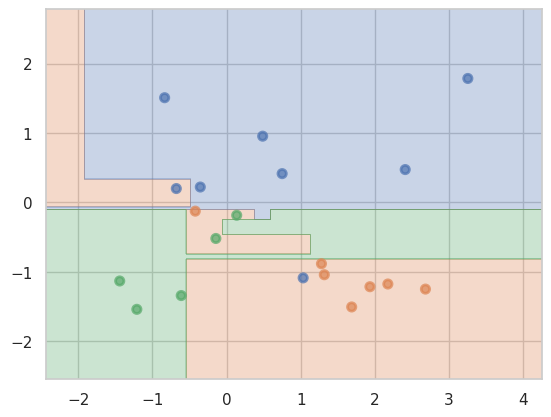

In [11]:
x_train, x_valid, y_train, y_valid = loader(3)# обучаем третье дерево
model = DecisionTreeClassifier(random_state = 123)
model.fit(x_train,  y_train)
plot_surface(model, x_train, y_train)
plt.figure()
plot_surface(model, x_valid, y_valid)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_valid, model.predict(x_valid)))


__Ответ:__ Да, некоторые деревья достаточно сильно переучились, но в некоторых случаях нельзя сказать, что переобучились очень сильно

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Best params: {'max_depth': 4, 'min_samples_leaf': 5}
Train: 0.93
Test: 0.90


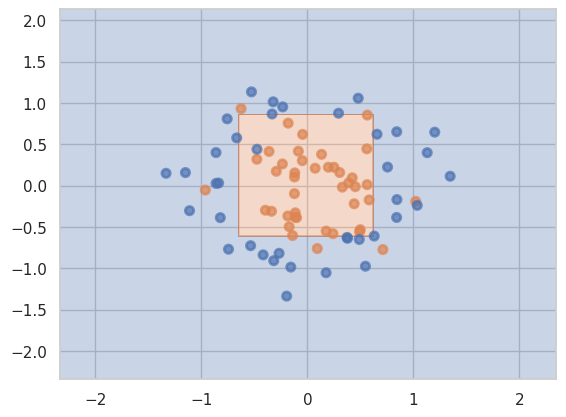

Best params: {'max_depth': 2, 'min_samples_leaf': 1}
Train: 0.90
Test: 0.95


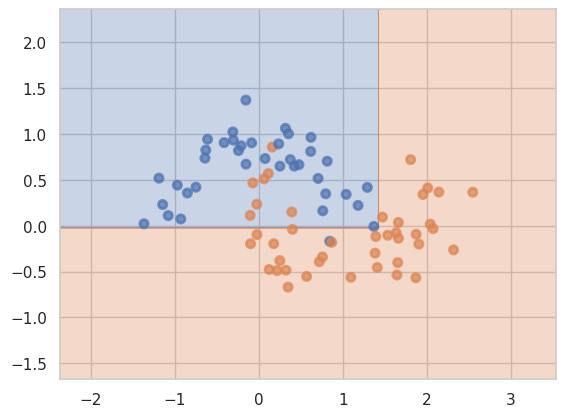

Best params: {'max_depth': 2, 'min_samples_leaf': 10}
Train: 0.88
Test: 0.85


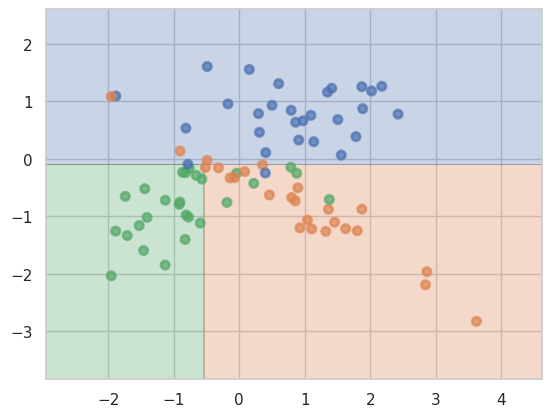

In [12]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2, 4, 6, 8, 10,],
    'min_samples_leaf': [1, 5, 10, 15,],
}

for i in range(1, 4):
    X_train, X_test, y_train, y_test = loader(i) # в этом цикле переберем параметры для лучшей модели под все датафреймы
    model = DecisionTreeClassifier(random_state = 123)

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        cv=3,
        scoring='accuracy',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_

    print(f"Best params: {grid_search.best_params_}")
    print(f"Train: {accuracy_score(y_train, best_clf.predict(X_train)):.2f}")
    print(f"Test: {accuracy_score(y_test, best_clf.predict(X_test)):.2f}")

    plot_surface(best_clf, X_train, y_train)
    plt.show()

max_depth  2
min_samples_leaf  1


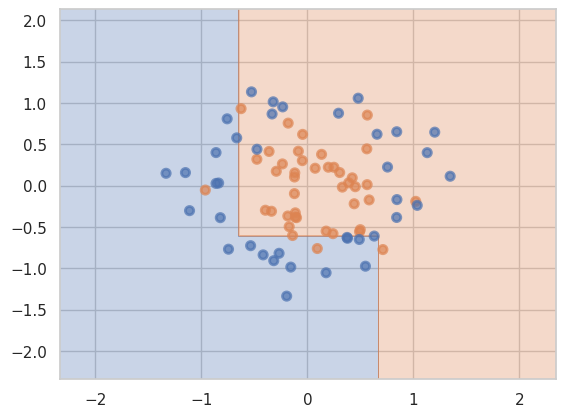

max_depth  2
min_samples_leaf  5


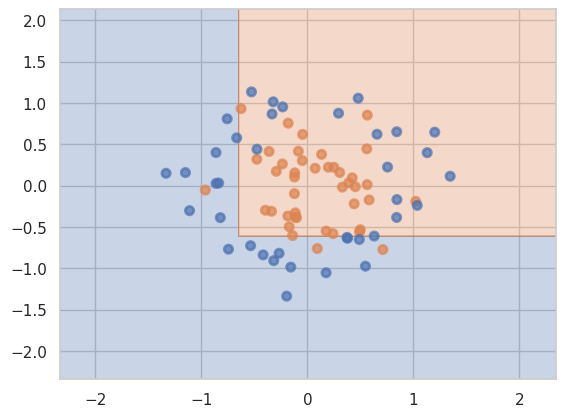

max_depth  2
min_samples_leaf  10


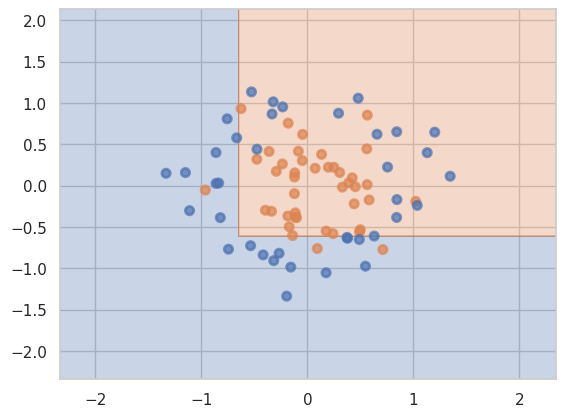

max_depth  2
min_samples_leaf  15


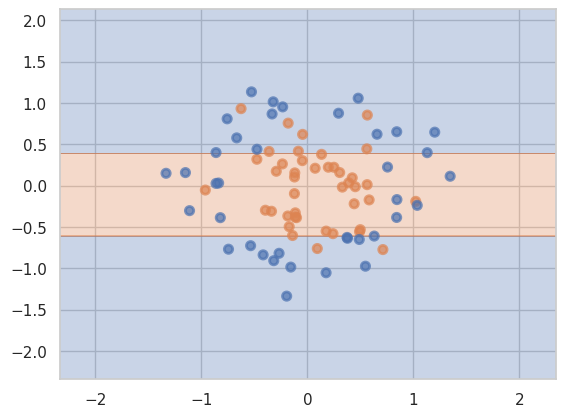

max_depth  4
min_samples_leaf  1


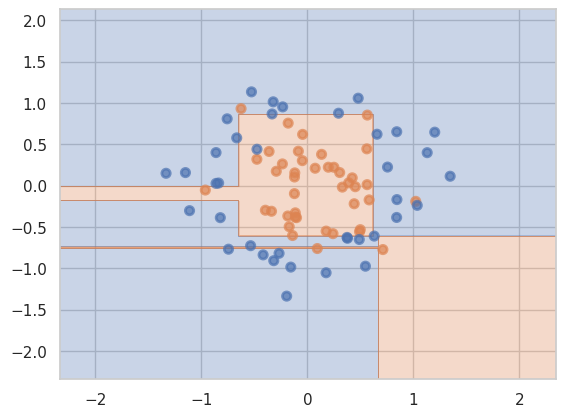

max_depth  4
min_samples_leaf  5


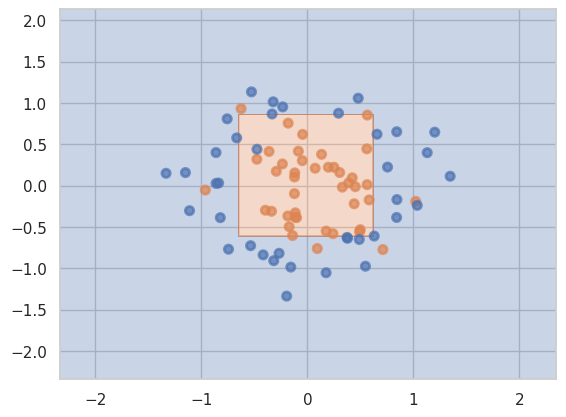

max_depth  4
min_samples_leaf  10


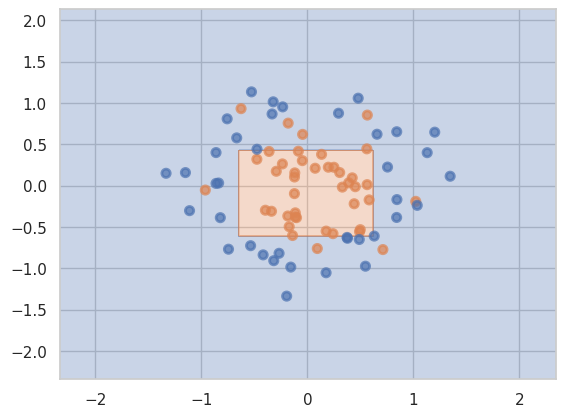

max_depth  4
min_samples_leaf  15


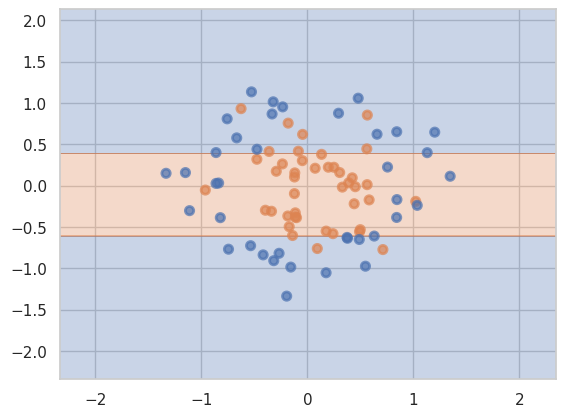

max_depth  6
min_samples_leaf  1


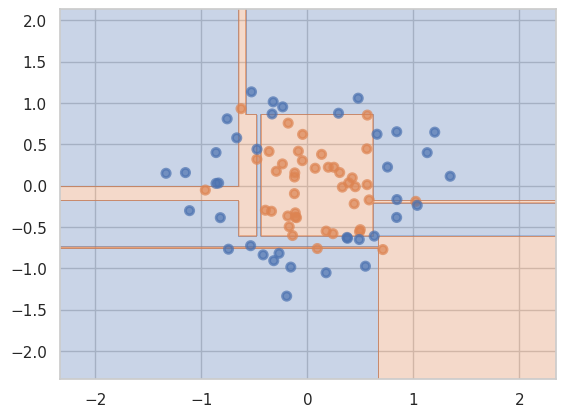

max_depth  6
min_samples_leaf  5


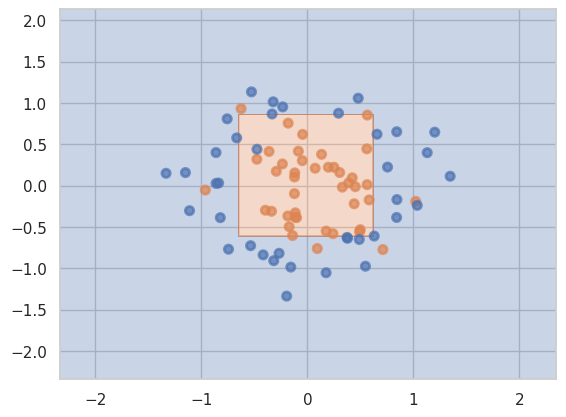

max_depth  6
min_samples_leaf  10


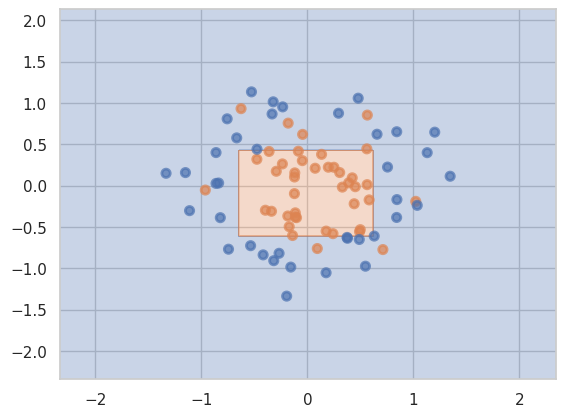

max_depth  6
min_samples_leaf  15


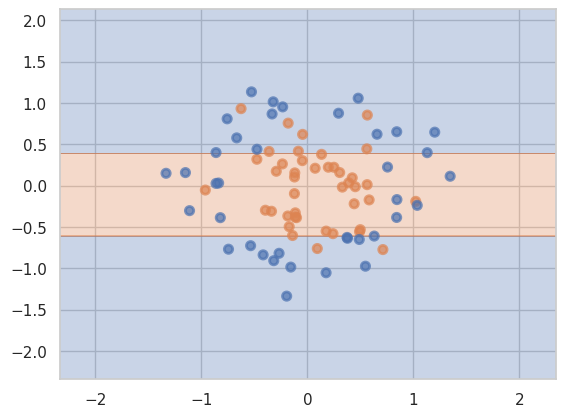

max_depth  8
min_samples_leaf  1


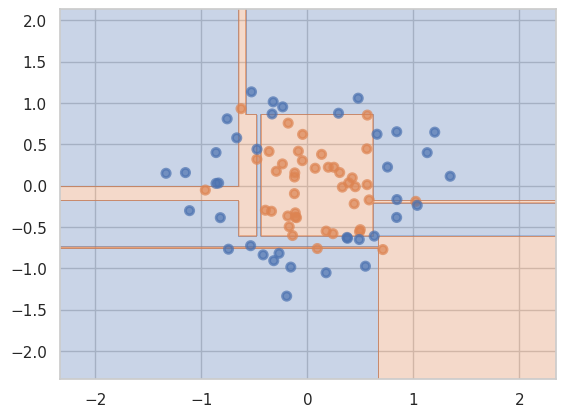

max_depth  8
min_samples_leaf  5


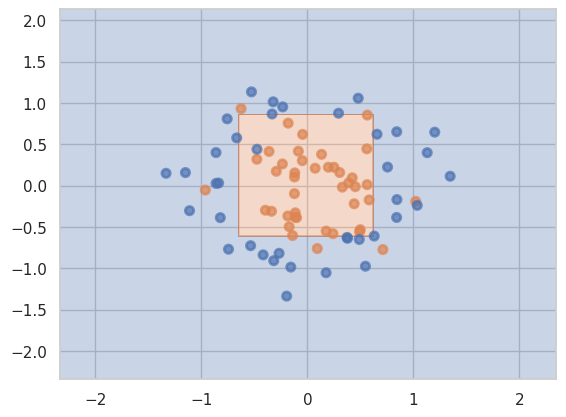

max_depth  8
min_samples_leaf  10


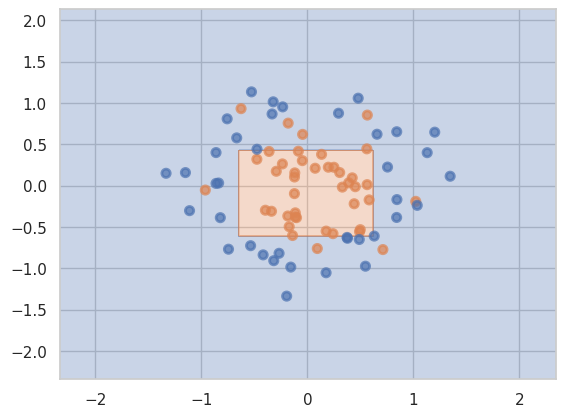

max_depth  8
min_samples_leaf  15


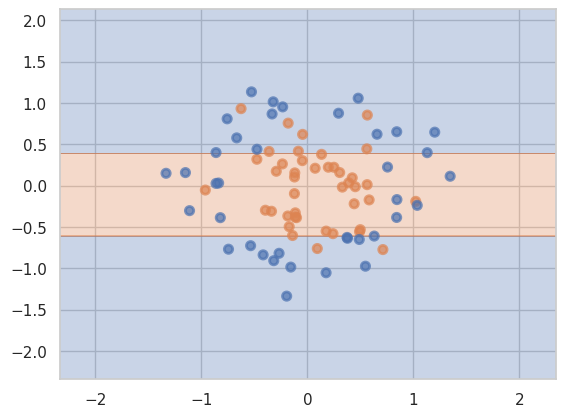

max_depth  10
min_samples_leaf  1


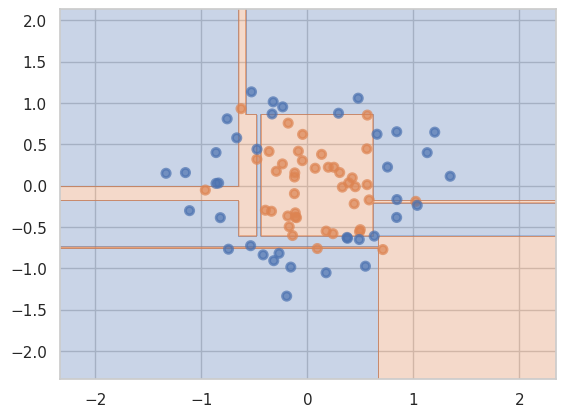

max_depth  10
min_samples_leaf  5


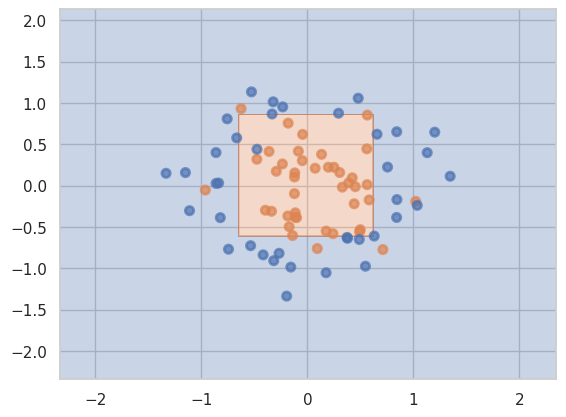

max_depth  10
min_samples_leaf  10


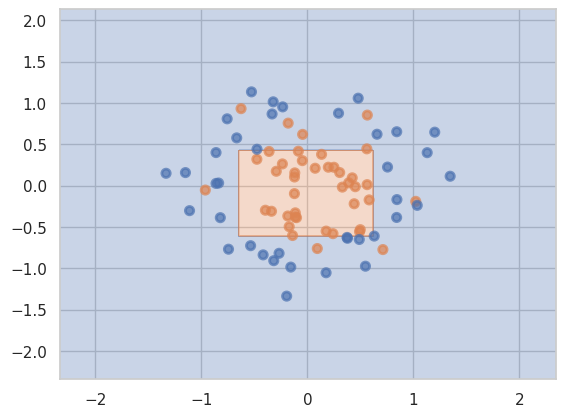

max_depth  10
min_samples_leaf  15


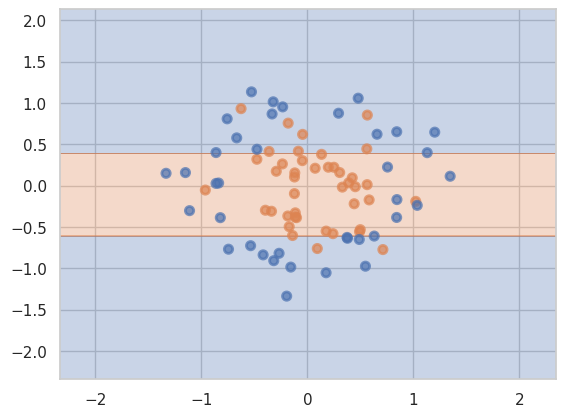

In [13]:
from sklearn.model_selection import GridSearchCV



def evolution(i): # функция, чтобы можно было нарисовать для любого датасета его "эволюцию"
    params = {
    'max_depth': [2, 4, 6, 8, 10,],
    'min_samples_leaf': [1, 5, 10, 15,],
    }
    X_train, X_test, y_train, y_test = loader(i)
    model = DecisionTreeClassifier(random_state = 123)

    for k in params['max_depth']:
      for d in params['min_samples_leaf']: # для всех возможных пар параметров учим модель и смотрим ее качество
        model = DecisionTreeClassifier(random_state = 123, max_depth = k, min_samples_leaf = d)
        model.fit(X_train, y_train)
        print('max_depth ', k)
        print('min_samples_leaf ', d)
        plot_surface(model, X_train, y_train)
        plt.show()
evolution(1)

__Ответ__: разделяющая поверхность сильно меняется, так как глубина дерева делает модель сильно сложнее. Например, при увеличении глубины дерева, форма разбиения становится более причудливой, а при увеличении числа листьев - более широкой

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

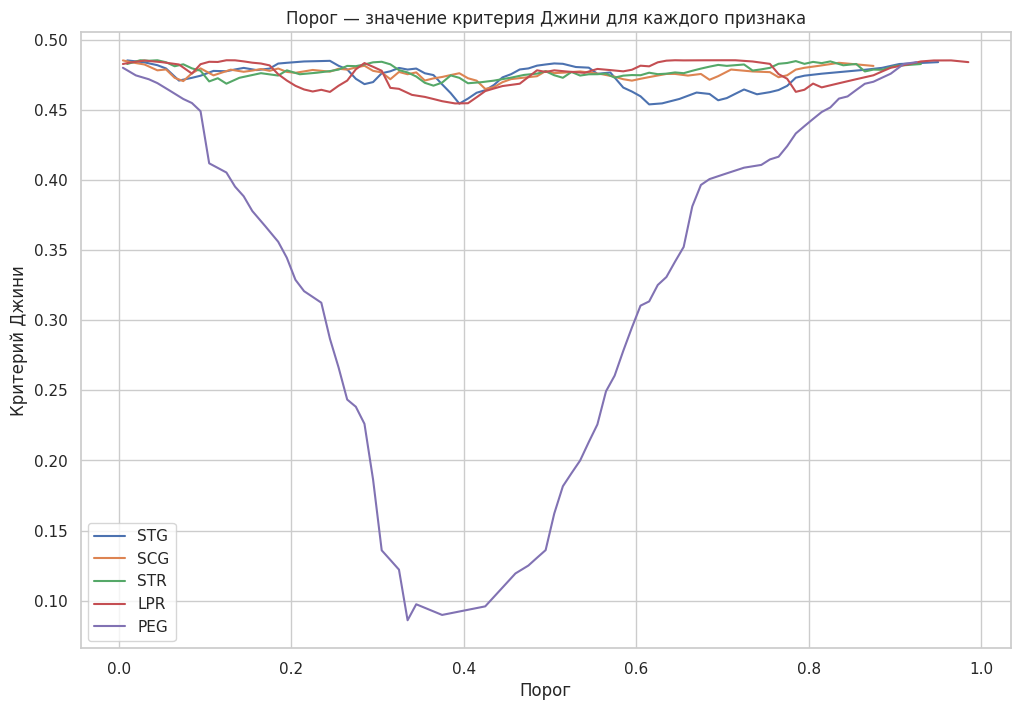

In [14]:
import matplotlib.pyplot as plt

df = pd.read_csv("Копия students.csv")
X = df.drop("UNS", axis=1)
y = df["UNS"]

plt.figure(figsize=(12, 8))

for i in X.columns:
    thresholds, ginis, _, _ = find_best_split(X[i].values, y.values)
    plt.plot(thresholds, ginis, label=i)

plt.title("Порог — значение критерия Джини для каждого признака")
plt.xlabel("Порог")
plt.ylabel("Критерий Джини")
plt.legend()
plt.grid(True)
plt.show()


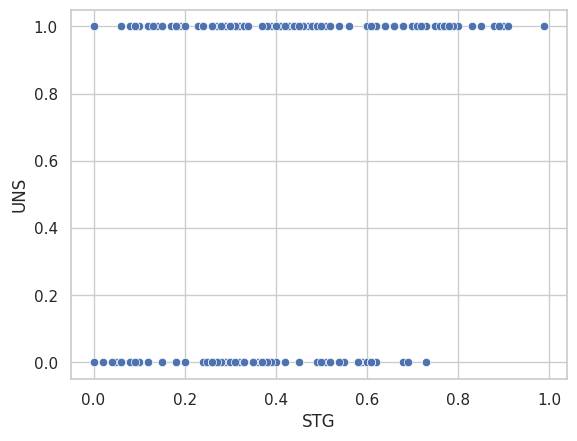

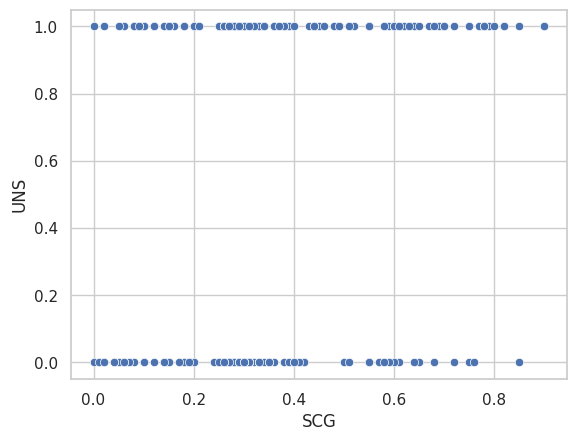

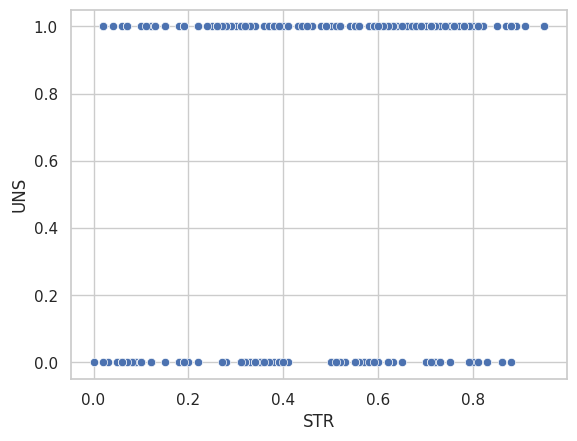

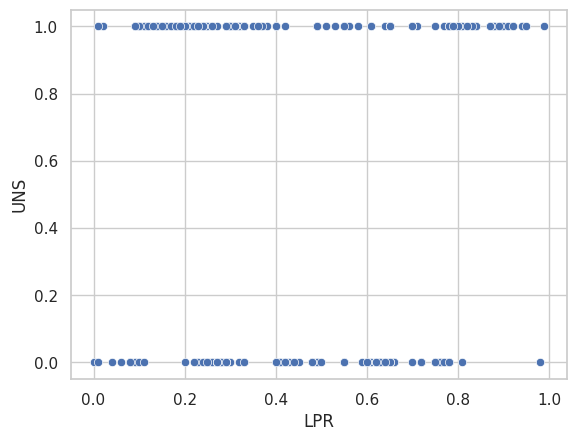

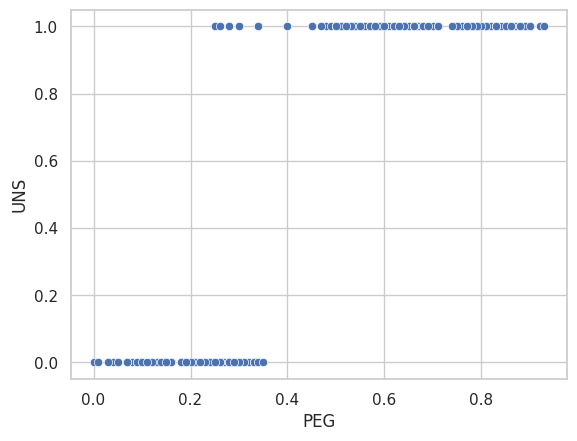

In [15]:
for i in X.columns:
    plt.figure()
    sns.scatterplot(x = X[i], y = y)

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** следует делить по признаку PEG. На графике gini мы видим, что его кривая имеет минимум. Если посмотреть на графики ниже, то можно увидеть, что для PEG < 0,4 мы имеем таргет 0, а для >0.4 наоборот, 1. Выбор совпадает. бесполезно делить выборку по признакам, у которых gini один и тот же для любых разбиений. Есть смысл делить по фичам, готовые имеют не плоский рельеф

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




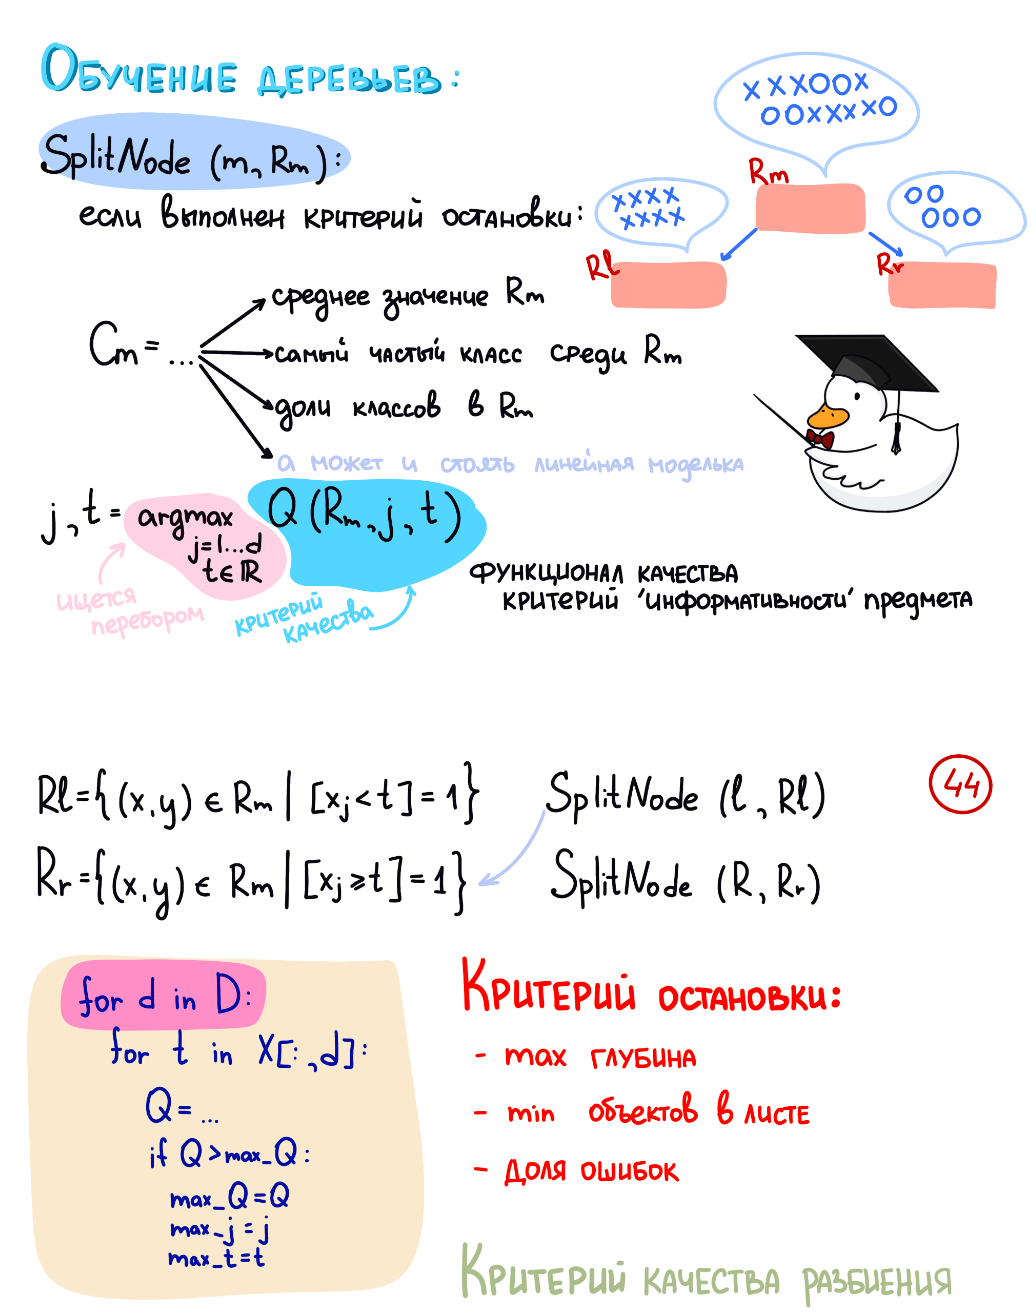

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tree_code import DecisionTree
cols = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape',
    'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
    'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color',
    'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

data = pd.read_csv('Копия agaricus-lepiota.data')
data.columns = cols
data.loc[data['class'] == 'p', 'class'] = 1
data.loc[data['class'] == 'e', 'class'] = 0

In [17]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,0,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,0,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,0,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [18]:
y = data['class'].astype(int).values
X_raw = data.drop("class", axis=1)
X = np.zeros_like(X_raw, dtype=int)

encoders = []

for i, col in enumerate(X_raw.columns):
    encoder = LabelEncoder()
    X[:, i] = encoder.fit_transform(X_raw[col])
    encoders.append(encoder)

feature_types = ["categorical"] * X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=98
)



In [20]:
new_model = DecisionTree(feature_types=feature_types, max_depth=5)
new_model.fit(X_train, y_train)

preds = new_model.predict(X_test)
acc = accuracy_score(y_test, preds)

print(f"Точность модели на тесте: {acc:.4f}")

Точность модели на тесте: 0.9990


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

In [22]:
pip install ucimlrepo

In [23]:
from ucimlrepo import fetch_ucirepo
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer

nursery = fetch_ucirepo(id=76)
X_nurse = nursery.data.features  # загрузим каждый датасет
y_nurse = nursery.data.targets

car_evaluation = fetch_ucirepo(id=19)
X_car = car_evaluation.data.features
y_car = car_evaluation.data.targets

mushroom = fetch_ucirepo(id=73)
X_mush = mushroom.data.features
y_mush = mushroom.data.targets

res_cat = {}

def evaluate_model(model, X, y): # функция для кросс валидации модели
    scorer = make_scorer(accuracy_score)
    try:
        scores = cross_val_score(model, X, y, cv=10, scoring=scorer)
        return scores.mean()
    except Exception as e:
        print(f"Ошибка при оценке модели: {e}")
        return np.nan

tic = pd.read_csv('Копия tic-tac-toe-endgame.csv')
X_tic= tic.drop('V10', axis = 1)
y_tic= tic['V10']

class CustomDecisionTreeWrapper(BaseEstimator): # это кастом, чтобы мы могли использовать cv
    def __init__(self, feature_types, max_depth=None, min_samples_split=2):
        self.tree = DecisionTree(feature_types, max_depth, min_samples_split)

    def fit(self, X, y):
        self.tree.fit(X, y)
        return self

    def predict(self, X):
        return self.tree.predict(X)

    def get_params(self, deep=True):
        return {
            "feature_types": self.tree._feature_types,
            "max_depth": self.tree._max_depth,
            "min_samples_split": self.tree._min_samples_split
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self.tree, f"_{param}", value)
        return self

def encoder(X): # энкодер для датасета
    xx = np.zeros_like(X, dtype=int)
    for i, j in enumerate(X.columns):
        le = LabelEncoder()
        xx[:,i] = le.fit_transform(X[j])
    return xx

X_nurse_enc = encoder(X_nurse) # кодируем каждый датасет
X_car_enc = encoder(X_car)
X_mush_enc = encoder(X_mush)
X_tic_enc = encoder(X_tic)

y_mush = (y_mush['poisonous'] == 'p').astype(int).values #  учим, валидируем нашу модель на каждом датасете, где дерево считает наши признаки категориальными
feature_types_mush = len(X_mush.columns)*['categorical']
model_categ_mush = CustomDecisionTreeWrapper(feature_types = feature_types_mush, max_depth=5)
model_categ_mush.fit(X_mush_enc, y_mush)
res_cat['mushrooms'] = evaluate_model(model_categ_mush, X_mush_enc, y_mush)

y_nurse = ((y_nurse['class'] != 'not_recom') | (y_nurse['class'] != 'recommend') ).astype(int).values
feature_types_nurse = len(X_nurse.columns)*['categorical']
model_categ_nurse = CustomDecisionTreeWrapper(feature_types = feature_types_nurse, max_depth=5)
model_categ_nurse.fit(X_nurse_enc, y_nurse)
res_cat['nurse'] = evaluate_model(model_categ_nurse, X_nurse_enc, y_nurse)

y_car = ( (y_car['class'] == 'good') | (y_car['class'] == 'vgood') ).astype(int).values
feature_types_car = len(X_car.columns)*['categorical']
model_categ_car = CustomDecisionTreeWrapper(feature_types = feature_types_mush, max_depth=5)
model_categ_car.fit(X_car_enc, y_car)
res_cat['car'] = evaluate_model(model_categ_car, X_car_enc, y_car)

y_tic = (y_tic == 'positive' ).astype(int).values
feature_types_tic = len(X_tic.columns)*['categorical']
model_categ_tic = CustomDecisionTreeWrapper(feature_types = feature_types_mush, max_depth=5)
model_categ_tic.fit(X_tic_enc, y_tic)
res_cat['tic'] = evaluate_model(model_categ_tic, X_tic_enc, y_tic)

In [24]:
from ucimlrepo import fetch_ucirepo
from sklearn.base import BaseEstimator

nursery = fetch_ucirepo(id=76) # делаем ровно то же самое, что и в предыдущем случае, но теперь наши признаки для дерева будут численными, а не категориальными
X_nurse = nursery.data.features
y_nurse = nursery.data.targets

car_evaluation = fetch_ucirepo(id=19)
X_car = car_evaluation.data.features
y_car = car_evaluation.data.targets

mushroom = fetch_ucirepo(id=73)
X_mush = mushroom.data.features
y_mush = mushroom.data.targets


tic = pd.read_csv('Копия tic-tac-toe-endgame.csv')
X_tic= tic.drop('V10', axis = 1)
y_tic= tic['V10']

class CustomDecisionTreeWrapper(BaseEstimator):
    def __init__(self, feature_types, max_depth=None, min_samples_split=2):
        self.tree = DecisionTree(feature_types, max_depth, min_samples_split)

    def fit(self, X, y):
        self.tree.fit(X, y)
        return self

    def predict(self, X):
        return self.tree.predict(X)

    def get_params(self, deep=True):
        return {
            "feature_types": self.tree._feature_types,
            "max_depth": self.tree._max_depth,
            "min_samples_split": self.tree._min_samples_split
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self.tree, f"_{param}", value)
        return self

def encoder(X):
    xx = np.zeros_like(X, dtype=int)
    for i, j in enumerate(X.columns):
        le = LabelEncoder()
        xx[:,i] = le.fit_transform(X[j])
    return xx

X_nurse_enc = encoder(X_nurse)
X_car_enc = encoder(X_car)
X_mush_enc = encoder(X_mush)
res_real = {}
y_mush = (y_mush['poisonous'] == 'p').astype(int).values
feature_types_mush = len(X_mush.columns)*['real']
model_real_mush = CustomDecisionTreeWrapper(feature_types = feature_types_mush, max_depth=5)
model_real_mush.fit(X_mush_enc, y_mush)
res_real['mushrooms'] = evaluate_model(model_real_mush, X_mush_enc, y_mush)


y_nurse = ((y_nurse['class'] != 'not_recom') | (y_nurse['class'] != 'recommend') ).astype(int).values
feature_types_nurse = len(X_nurse.columns)*['real']
model_real_nurse = CustomDecisionTreeWrapper(feature_types = feature_types_nurse, max_depth=5)
model_real_nurse.fit(X_nurse_enc, y_nurse)
res_real['nurse'] = evaluate_model(model_real_nurse, X_nurse_enc, y_nurse)


y_car = ( (y_car['class'] == 'good') | (y_car['class'] == 'vgood') ).astype(int).values
feature_types_car = len(X_car.columns)*['real']
model_real_car = CustomDecisionTreeWrapper(feature_types = feature_types_mush, max_depth=5)
model_real_car.fit(X_car_enc, y_car)
res_real['car'] = evaluate_model(model_real_car, X_car_enc, y_car)


y_tic = (y_tic == 'positive' ).astype(int).values
feature_types_tic = len(X_tic.columns)*['categorical']
model_real_tic = CustomDecisionTreeWrapper(feature_types = feature_types_mush, max_depth=5)
model_real_tic.fit(X_tic_enc, y_tic)
res_real['tic'] = evaluate_model(model_real_tic, X_tic_enc, y_tic)

In [25]:
from ucimlrepo import fetch_ucirepo
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, make_scorer
res_sklearn = {}
scorer = make_scorer(accuracy_score) # почти все то же самое, но теперь учим модель из sklearn
nursery = fetch_ucirepo(id=76)
X_nurse = nursery.data.features
y_nurse = nursery.data.targets
for i in X_nurse.columns:
  le = LabelEncoder()
  X_nurse[i] = le.fit_transform(X_nurse[i])
model = DecisionTreeClassifier()
res_sklearn['nurse'] = cross_val_score(model, X_nurse, y_nurse, cv=10, scoring = scorer).mean()

car_evaluation = fetch_ucirepo(id=19)
X_car = car_evaluation.data.features
y_car = car_evaluation.data.targets
for i in X_car.columns:
  le = LabelEncoder()
  X_car[i] = le.fit_transform(X_car[i])
model = DecisionTreeClassifier()
res_sklearn['car'] = cross_val_score(model, X_car, y_car, cv=10, scoring = scorer).mean()

mushroom = fetch_ucirepo(id=73)
X_mush = mushroom.data.features
y_mush = mushroom.data.targets
for i in X_mush.columns:
  le = LabelEncoder()
  X_mush[i] = le.fit_transform(X_mush[i])
model = DecisionTreeClassifier()
res_sklearn['mushrooms'] = cross_val_score(model, X_mush, y_mush, cv=10, scoring = scorer).mean()

tic = pd.read_csv('Копия tic-tac-toe-endgame.csv')
X_tic= tic.drop('V10', axis = 1)
y_tic= tic['V10']
for i in X_tic.columns:
  le = LabelEncoder()
  X_tic[i] = le.fit_transform(X_tic[i])
model = DecisionTreeClassifier()
res_sklearn['tic'] = cross_val_score(model, X_tic, y_tic, cv=10, scoring = scorer).mean()


In [26]:
res_sklearn = pd.DataFrame.from_dict(res_sklearn, orient='index') # обработка получившихся словарей
res_real = pd.DataFrame.from_dict(res_real, orient='index')
res_cat = pd.DataFrame.from_dict(res_cat, orient='index')

In [27]:
dst = res_cat.merge(res_real, left_index=True, right_index=True, how='inner').merge(res_sklearn, left_index=True, right_index=True, how='inner')

In [28]:
dst.columns = ['categorical', 'real', 'sklearnDT']

In [29]:
dst

,categorical,real,sklearnDT
mushrooms,0.997537,0.970573,0.961123
nurse,1.000000,1.000000,0.811265
car,0.951899,0.914320,0.863533
tic,0.479759,0.467259,0.762325


Видим, что в качестве категорий дереву легче принимать решения и точность получилась выше

__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


# Как дела?

In [ ]:
### Чет страшно за экзы...